In [3]:
import pandas as pd

In [4]:
train_dataset=pd.read_csv(r"C:\Users\user\Desktop\train.csv")

In [5]:
test_dataset=pd.read_csv(r"C:\Users\user\Desktop\test.csv")

In [8]:
train_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
train_dataset.shape

(891, 12)

In [14]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
train_dataset['Age'].isnull().sum()

np.int64(177)

In [16]:
train_dataset['Age'].median()

28.0

In [17]:
train_dataset['Age'].fillna(train_dataset['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [18]:
train_dataset['Age'].isnull().sum()

np.int64(177)

In [19]:
train_dataset['Cabin'].isnull().sum()

np.int64(687)

In [24]:
train_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [23]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [22]:
train_dataset['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [29]:
mode_value=train_dataset['Embarked'].mode()[0]
train_dataset['Embarked']=train_dataset['Embarked'].fillna(mode_value)

In [26]:
train_dataset.isnull().sum(0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [ ]:
train_dataset.head(15)

In [ ]:
train_dataset.dtypes

In [ ]:
train_dataset['Survived']=train_dataset['Survived'].astype('category')

In [ ]:
train_dataset['Pclass']=train_dataset['Pclass'].astype('category')

In [ ]:
train_dataset['Embarked']=train_dataset['Embarked'].astype('category')

In [27]:
train_dataset['Sex']=train_dataset['Sex'].astype('category')

In [28]:
train_dataset.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
dtype: object

In [ ]:
train_dataset

In [29]:
train_dataset[['Age','Fare','SibSp','Parch']].describe()

,Age,Fare,SibSp,Parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,14.526497,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


In [ ]:
##Numeric Summary;Age and Fare
-The Median age of Passenger is 28yrs,with a very few young and older passengers.
-Most fares where cheap(median~14),but some were very expensive(max~512)
-Some passengers hade no siblings/spouses or parents/children onbaord.

In [30]:
for col in['Survived','Pclass','Sex','Embarked']:
   print(train_dataset[col].value_counts())
   print(train_dataset[col].value_counts(normalize=True)*100)

Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64
Sex
male      577
female    314
Name: count, dtype: int64
Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: proportion, dtype: float64


In [ ]:
##Categorical Summary
-Out of all the passengers,62% survived while 38% did not survive
-Most passengers purchased 3rd class tickets,with a ratio of 64% of males to 35% of females 
-Also,72% of the passengers embarked from southampton,followed by cherbourg with 19% and so on...

In [31]:
train_dataset.groupby('Sex',observed=True)['Survived'].value_counts(normalize=True)* 100

Sex     Survived
female  1           74.203822
        0           25.796178
male    0           81.109185
        1           18.890815
Name: proportion, dtype: float64

In [32]:
train_dataset.groupby('Pclass',observed=True)['Survived'].value_counts(normalize=True)* 100

Pclass  Survived
1       1           62.962963
        0           37.037037
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: proportion, dtype: float64

In [33]:
train_dataset.groupby('Embarked',observed=True)['Survived'].value_counts(normalize=True)* 100

Embarked  Survived
C         1           55.357143
          0           44.642857
Q         0           61.038961
          1           38.961039
S         0           66.099071
          1           33.900929
Name: proportion, dtype: float64

In [30]:
train_dataset.groupby(["Sex","Pclass"],observed=True)["Survived"].value_counts()

Sex     Pclass  Survived
female  1       1            91
                0             3
        2       1            70
                0             6
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: count, dtype: int64

In [10]:
import seaborn as sns

In [11]:
import matplotlib as plt

In [12]:
import numpy as np

Text(0, 0.5, 'Proportion Survived')

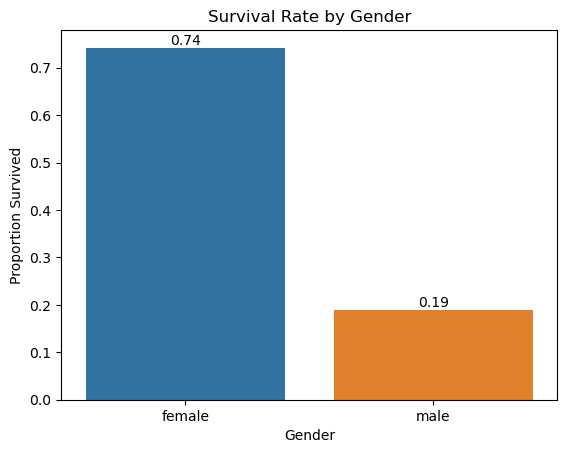

In [89]:
ax=sns.barplot(x="Sex",y="Survived", hue="Sex", data=train_dataset, estimator=lambda x:sum(x)/len(x),errorbar=None)
for container in ax.containers:
    ax.bar_label(container,fmt="%.2f")
ax.set_title("Survival Rate by Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Proportion Survived")

In [ ]:
##Insight
From the chart above the bsurvival rate of females was much higher than that of males.
This shows that women were more likely to survive than men on the Titanic

Text(0, 0.5, 'Proportion Survived')

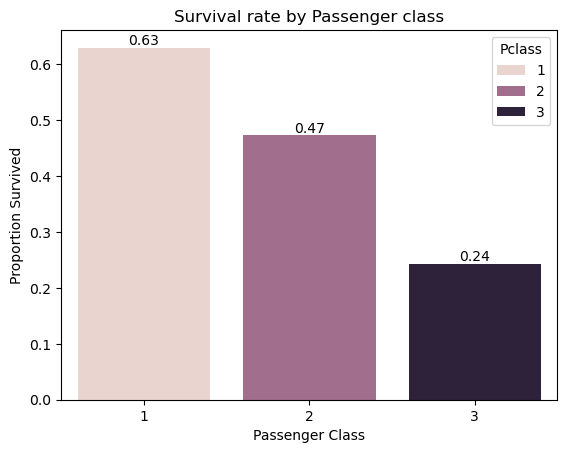

In [91]:
ax=sns.barplot(x="Pclass",y="Survived",hue="Pclass", data=train_dataset,estimator=lambda x: sum(x)/len(x),errorbar=None)
for container in ax.containers:
    ax.bar_label(container,fmt="%.2f")
ax.set_title("Survival rate by Passenger class")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Proportion Survived")

In [ ]:
##Insights
From the chart above,passengers that purchased the first class ticket had the highest survival rate on the titanic

Text(0, 0.5, 'Proportion Survived')

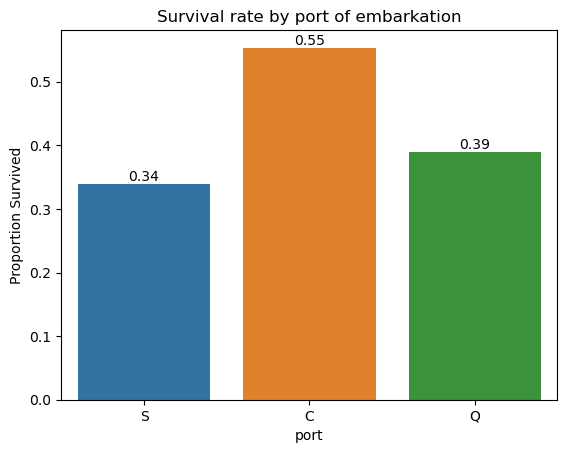

In [95]:
ax=sns.barplot(x="Embarked",y="Survived",hue="Embarked", data=train_dataset,estimator=lambda x: sum(x)/len(x),errorbar=None)
for container in ax.containers:
    ax.bar_label(container,fmt="%.2f")
ax.set_title("Survival rate by port of embarkation")
ax.set_xlabel("port")
ax.set_ylabel("Proportion Survived")
embarked_

In [ ]:
##Insights
passengers that embarked from C (Cherbourg) port had the highest survival rate compared to other ports

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Correlation Heatmap of Titanic Dataset')

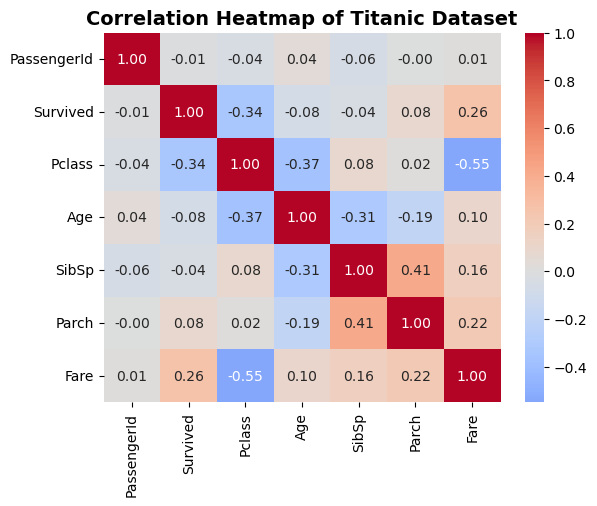

In [34]:
corr=train_dataset.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap="coolwarm",center=0,fmt=".2f")
plt.title("Correlation Heatmap of Titanic Dataset",fontsize=14,fontweight="bold")

In [ ]:
##Insights from the correlation heatmap
*

Text(50.722222222222214, 0.5, 'Sex')

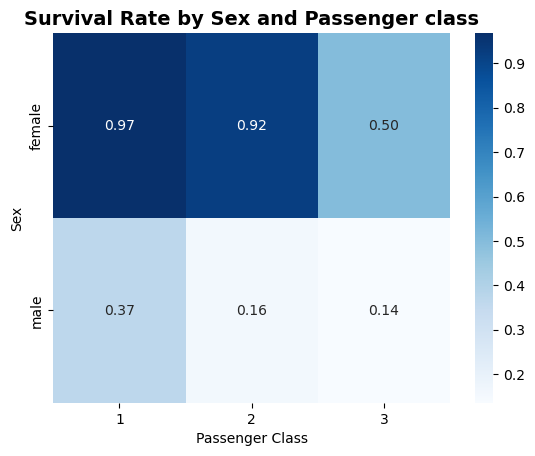

In [31]:
pivot=train_dataset.pivot_table(index="Sex",columns="Pclass",values="Survived",aggfunc="mean")
sns.heatmap(pivot,annot=True,cmap="Blues",fmt=".2f")
plt.title("Survival Rate by Sex and Passenger class",fontsize=14,fontweight="bold")
plt.xlabel("Passenger Class")
plt.ylabel("Sex")